In [1]:
import spaces as sp
import vehicles as vs
import controllers as cs

from lib import *
from tools import *

Для начала прочтем информацию из конфигурационного файла.

-------------------------------------------------------------------------------------
First, let's read the information from the configuration file.

In [2]:
arguments = read_and_assign_arguments("config.json")

Конфигурационный фаил содержит следующие параметры.

-------------------------------------------------------------------------------------
The configuration file contains the following parameters.

In [3]:
for arg_key, arg_val in get_class_attributes(arguments).items():
    print(f'{arg_key}: {arg_val}')

clean_cache: False
big_picture: False
not_animated: False
store_raw: False
separating_plots: False
store_plot: False
isometric: False
grid_size: 500
axis_abs_max: 15
isolines: 10
peaks_filename: peaks_.json
cache_dir: data
peak_type: gaussian
controller_type: intensity
vehicle_types: ['dubins', 'otter']
start_points: [[-10, 0], [-8, 0]]
shift_vehicle: [-10, 0]
shift_xyz: [0, 0, 0]
target_isoline: 10
sim_time_sec: 50
sample_time: 0.02
cycles: 1
radius: 1
vehicles: 1
FPS: 30
V_current: 0
beta_current: 30.0
data_storage: None


Параметры __clean_cache, big_picture, not_animated, store_raw, separating_plots, store_plot, isometric, cache_dir, V_current, beta_current, data_storage__ - не будут рассматриваться поскольку необходимы для запуска через скрипт main и определяют работу с артефактами исполнения кода.
 * __grid_size__ определяет разрешение графика (чем больше - тем дольше будет отрисовка)
 * __axis_abs_max__ задает в абсолютном значении границы области графика траектории, например значение 15 определит область графика траектории,   как X(-15,15), Y(-15,15) (чем больше - тем дольше будет отрисовка)
 * __isolines__ задает колличество изолиний графика интенсивности, данное значение влияет только на визуальную составляющую
 * __peaks_filename__ имя файла содержащего координаты и геометрические характеристики пиков поля интенсивности (формат json, подробнее смотри в соответствующий фаил)
 * __peak_type__ определяет тип функции которым будет описываться поле интенсивности, на данный момент доступно два типа __gaussian__, __parabolic__
 * __controller_type__ определяет тип контроллера, на данный момент доступен только индивидуальный контроллер основанный на мгновенном измерении интенсивности __intensity__
 * __vehicle_types__ определяет тип транспортных средств участвующих в симуляции, на данный момент доступно два типа __otter__ - судно катамаран и __dubins__ - тележка Дубинса. Типы можно указывать вместе, так как симуляция независимая все движение будет происходить из одной начальной точки независимо для каждого типа транспортного средства.
 * __start_points__ задает стартовые условия для каждого транспортного средства участвующего в симуляции. Параметр может отсутствовать, тогда для одного транспортного средства начальная точка будет в центре координат. Если параметр содержит количество пар стартовых условий соответствующее параметру __vehicles__, то для каждого транспортного средства будет применяться свое начальное условие. Если __vehicles__ больше единицы, а параметр стартовых условий отсутствует, стартовые условия будут выбраны случайным образом в окрестности обозначенной параметром __radius__
 * __shift_vehicle__ задает смещение всех транспортных средств, используется для быстрой корректировки конфигурации начальных условий
 * __shift_xyz__ задает смещение поля концентрации, как и __shift_vehicle__ используется для быстрой корректировки начальных параметров. По умолчанию координаты пиков поля отсчитываются от начала координат
 * __target_isoline__ задает целевое значение концентрации поля которое должен обнаружить робот
 * __sim_time_sec__ задает время симуляции в секундах (чем больше - тем дольше будет расчет)
 * __sample_time__ задает минимальное время шага расчета
 * __cycles__ задает количество циклов расчета, каждый цикл создается новый экземпляр контроллера и производится симуляция, используйте параметр количества циклов для работы с разными начальными условиями
 * __radius__ задает радиус в котором будут выбраны начальные условия случайным образом
 * __vehicles__ определяет количество транспортных средств в симуляции, так как __dubins__ эталонный алгоритм в этой задаче, транспортные средства этого типа не учитываются в этом параметре
 * __FPS__ задает частоту кадров анимации движения транспортных средств в поле

-------------------------------------------------------------------------------------
The __clean_cache, big_picture, not_animated, store_raw, separating_plots, store_plot, isometric, cache_dir, V_current, beta_current, data_storage__ parameters will not be considered because they are necessary for running through the main script and determine how to work with code execution artifacts.
 * __grid_size__ defines the resolution of the graph (the larger, the longer the rendering will take)
* __axis_abs_max__ sets the boundaries of the trajectory graph area in absolute terms, for example, the value 15 defines the trajectory graph area as X(-15.15), Y(-15.15) (the larger - the longer the rendering will take)
 * __isolines__ sets the number of isolines of the intensity graph, this value affects only the visual component
 * __peaks_filename__ the name of the file containing the coordinates and geometric characteristics of the peaks of the intensity field (json format, for more information, see the corresponding file)
* __peak_type__ defines the type of function that will describe the intensity field, currently two types are available __gaussian__, __parabolic__
 * __controller_type__ defines the type of controller, currently only an individual controller is available based on the instantaneous measurement of intensity __intensity__
 * __vehicle_types__ defines the type of vehicles involved in the simulation, currently two types are available __otter__ - catamaran vessel and __dubins__ - Dubins trolley. The types can be specified together, since the simulation is independent. All movement will occur from one starting point independently for each type of vehicle.
 * __start_points__ sets the starting conditions for each vehicle participating in the simulation. The parameter may be omitted, then for one vehicle the starting point will be in the coordinate center. If the parameter contains the number of pairs of starting conditions corresponding to the __vehicles__ parameter, then each vehicle will have its own initial condition applied. If __vehicles__ is greater than one and the starting conditions parameter is missing, the starting conditions will be randomly selected in the vicinity indicated by the __radius parameter.__
 * __shift_vehicle__ sets the offset of all vehicles, used to quickly adjust the configuration of the initial conditions
 * __shift_xyz__ sets the offset of the concentration field, as well as __shift_vehicle__ used to quickly adjust the initial parameters. By default, the coordinates of the field peaks are calculated from the origin
 * __target_isolate__ sets the target value of the field concentration to be detected by the robot
 * __sim_time_sec__ sets the simulation time in seconds (the longer it is, the longer the calculation will take)
* __sample_time__ sets the minimum calculation step time
 * __cycles__ sets the number of calculation cycles, each cycle creates a new instance of the controller and simulates it. Use the number of cycles parameter to work with different initial conditions
 * __radius__ sets the radius where the initial conditions will be randomly selected
 * __vehicles__ determines the number of vehicles in the simulation, since __dubins__ is the reference algorithm for this task, vehicles of this type are not counted in this parameter
 * __FPS__ sets the frame rate of vehicle motion animation in the field

Все параметры можно изменить в ручном режиме вызвав соответствующий аттрибут класа Arguments

--------------------------------------------------------------------------------------------------------
All parameters can be changed manually by calling the appropriate attribute of the Arguments class.

In [ ]:
arguments.isoline = 15

Дальнейшая логика программы описывает работу с начальными условиями, для подробной информации обратитесь к пояснению параметра __start_points__ на странице выше. В список _vehicles_ добавляется экземпляр класса транспортного средства соответствующего его краткому названию. Подробнее смотри _create_instance_

--------------------------------------------------------------------------------------------------
The further logic of the program describes how to work with the initial conditions. For more information, see the explanation of the __start_points__ parameter on the page above. An instance of the vehicle class corresponding to its short name is added to the _vehicles_ list. For more information, see _create_instance_

In [4]:
if arguments.vehicles == 1:
    starting_points = [[0, 0]]
elif len(arguments.start_points) == arguments.vehicles:
    starting_points = arguments.start_points
else:
    starting_points = [next(point_generator(arguments.radius, arguments.vehicles)) for _ in range(arguments.vehicles)]
vehicles = []
ng = number_generator()
cg = color_generator()
for vehicle_name in arguments.vehicle_types:
    for order_number in range(arguments.vehicles):
        vehicles.append(vs.create_instance(vehicle_name,
                                           V_current=arguments.V_current,
                                           serial_number=next(ng),
                                           shift=arguments.shift_vehicle,
                                           color=next(cg),
                                           starting_point=starting_points[order_number]))
for vehicle in vehicles:
    print(vehicle)

---vehicle--------------------------------------------------------------------------
Dubins Vehicle (see 'dubins.py' for more details)
Length: 2.0 m
Control: sigma
Wheel radius: 0.315 m
Distance between the wheels: 1 m
Starting point: [-10.0, 0.0]
---vehicle--------------------------------------------------------------------------
Otter USV (see 'otter.py' for more details)
Length: 2.0 m
Control: sigma
Starting point: [-10.0, 0.0]


Следующим шагом зададим пространство. Пространство существует, как набор пиков. Размер пространства определен __grid_size__. Значение концентрации поля в точке определяется аналитически.

-------------------------------------------------------------------------------------------------------------------------
The next step is to set the space. Space exists as a set of peaks. The size of the space is defined by __grid_size__. The value of the field concentration at a point is determined analytically.

In [5]:
space = sp.create_instance(arguments.peak_type,
                           x_range=(-arguments.axis_abs_max, arguments.axis_abs_max),
                           y_range=(-arguments.axis_abs_max, arguments.axis_abs_max),
                           grid_size=arguments.grid_size,
                           shift_xyz=arguments.shift_xyz,
                           space_filename=arguments.peaks_filename,
                           target_isoline=arguments.target_isoline)
space.set_contour_points(tol=1)
print(space)

---space--------------------------------------------------------------------
Space type: gaussian
Shifting space: 
	shift_x=0
	shift_y=0
	shift_z=0
Target isoline: 10


Множество точек искомой кривой определяется так же аналитически и в последствии используется для проверки попадания на изолинию

-----------------------------------------------------------------------------------------------------------------
The set of points of the desired curve is determined analytically in the same way and is subsequently used to check whether it falls on the contour line.

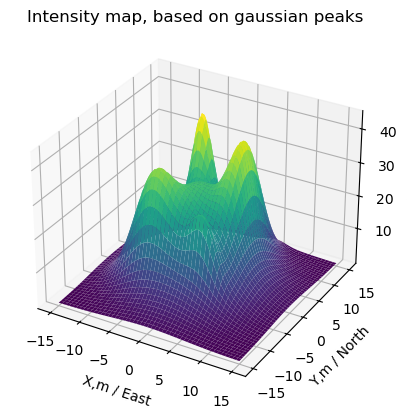

In [6]:
plotting_all(space)

Следующим шагом создаем контроллер. Контроллер содержит закон управления, функции расчета и отрисовки графиков параметров симуляции. Мы производим визуальный мониторинг следующих значений. Значение измеренной интенсивности на протяжении всей симуляции, позволяет понять на сколько близко находится к целевой изолинии робот во время движения. Значение накопленной дистанции между траекторией робота и изолинией поля, в каждый момент времени происходит расчет расстояния между точкой в которой находится транспортное средство и ближайшей точкой изолинии, чем расстояние меньше тем более пологим будет график, значение накопленной дистанции является линейной зависимостью и может быть определено только в положительной области. Значение производной и функции управления, представляет из себя графики двух величин, производная от интенсивности измеренной в данный момент времени и соответствующее ей значение закона управления.
Оценка эффективности закона управления так же происходит по этим значениям, пример оценки будет дан позже.

--------------------------------------------------------------------------------------------------------------
The next step is to create a controller. The controller contains a control law, functions for calculating and drawing graphs of simulation parameters. We visually monitor the following values. The value of the measured intensity throughout the simulation allows you to understand how close the robot is to the target contour during movement. The value of the accumulated distance between the trajectory of the robot and the isoline of the field, at each moment in time the distance is calculated between the point where the vehicle is located and the nearest point of the isoline, the smaller the distance, the more flat the graph will be, the value of the accumulated distance is a linear relationship and can only be determined in a positive area. The value of the derivative and the control function are graphs of two quantities, the derivative of the intensity measured at a given time and the corresponding value of the control law.
The effectiveness of the management law is also evaluated using these values, an example of an assessment will be given later.

In [7]:
controller = cs.create_instance(arguments.controller_type,
                                vehicles=vehicles,
                                sim_time=arguments.sim_time_sec,
                                sample_time=arguments.sample_time,
                                space=space,
                                FPS=arguments.FPS,
                                isolines=arguments.isolines)
print(controller)

---controller--------------------------------------------------------------------------
Individual intensity based controller
Sampling frequency: 50 Hz
Sampling time: 0.02 seconds
Simulation time: 50 seconds
Numbers of vehicles: 2


Симуляция происходит по принципам работы с матричными данными заложенными в изначальной версии симулятора профессором Фоссеном. Количество шагов итерации всегда на 1 больше для того чтобы последний шаг всегда включался в финальный расчет.

-------------------------------------------------------------------------------------------------------------
The simulation takes place according to the principles of working with matrix data laid down in the original version of the simulator by Professor Fossen. The number of iteration steps is always 1 more so that the last step is always included in the final calculation.

In [9]:
swarmData = simultaneous_simulate(controller=controller)

Vehicle Simulation x2: 100%|██████████| 2501/2501 [01:05<00:00, 38.00it/s]


Ниже представлены графики интенсивности, закона управления и накопленной дистанции, графики можно строить, как отдельно, методами _controller_, так и все вместе функцией _plotting_all_

-------------------------------------------------------------------------------------------------------------
The graphs of intensity, control law, and accumulated distance are shown below. The graphs can be constructed either separately using _controller_ methods, or collectively using the _plotting_all function._

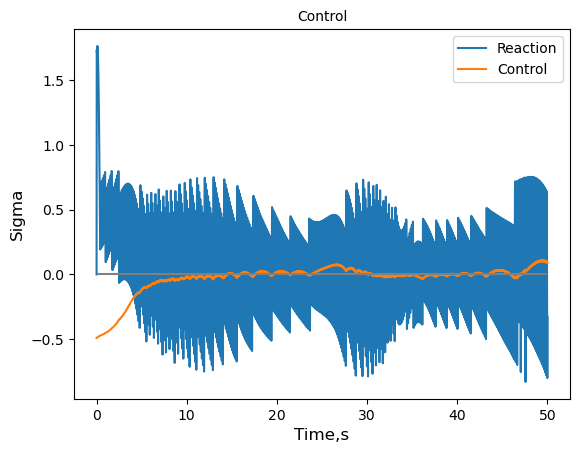

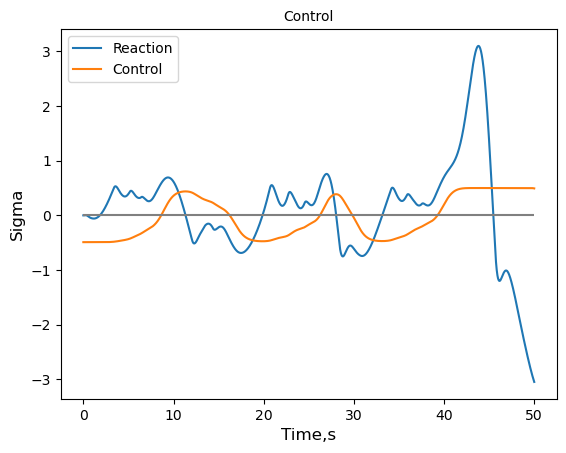

In [10]:
controller.plotting_sigma()

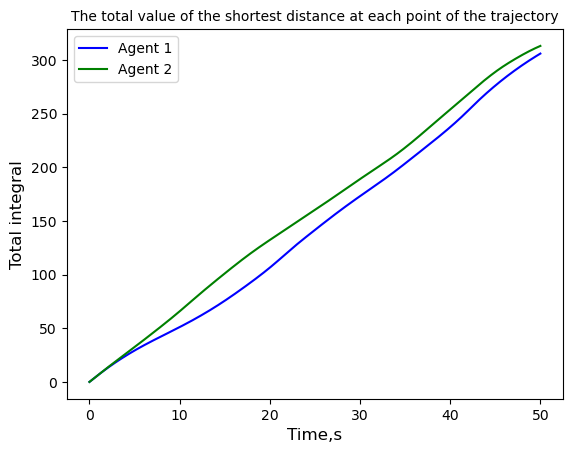

In [11]:
controller.plotting_quality()

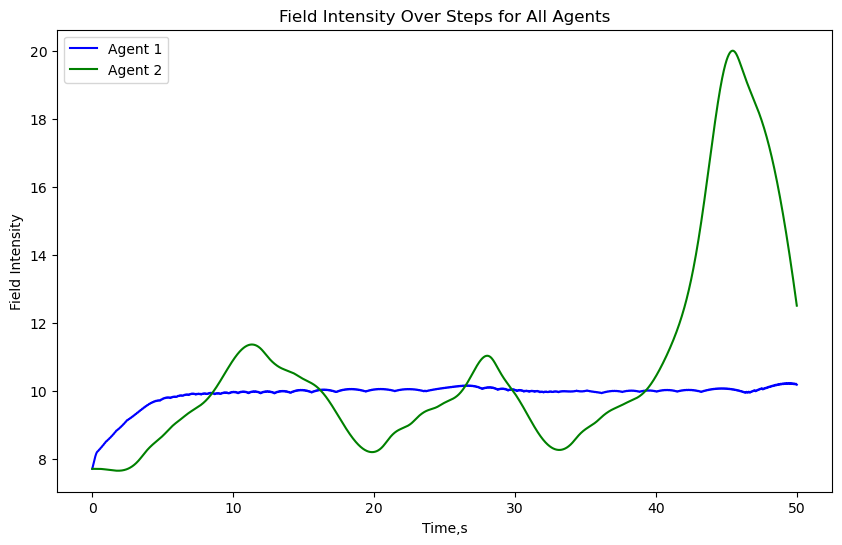

In [12]:
controller.plotting_intensity()

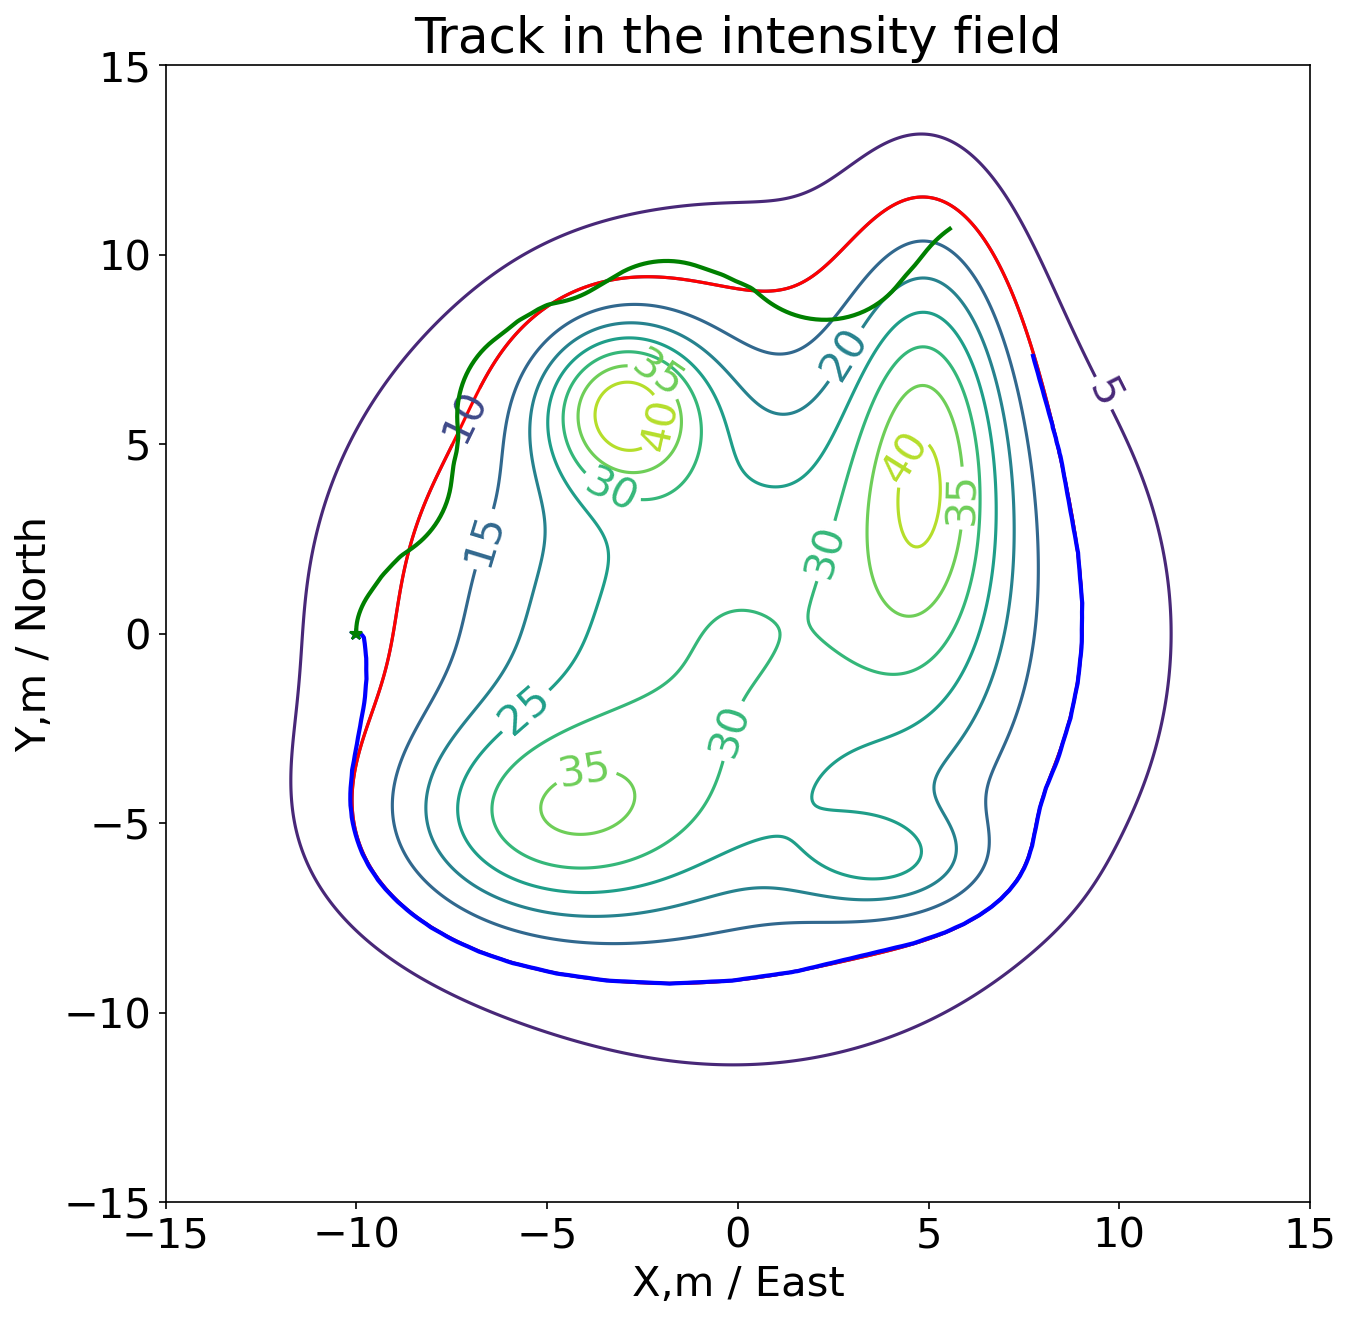

In [13]:
controller.plotting_track(swarmData=swarmData)